# Introduction to Feature engineering and data Preparation

In the real world not every data set is machine learning ready, we oftenneed to perform data clearing or try to produce more usable features.

Feature engineering : - Is the process of doamin knowledge to extract features from raw data via data mining techniques.

There are three general approaches for data mining.
1. Extracting Information
2. Combining Information
3. Transforming Information

Extracting Information: -  It means we extract the data (which is to difficult for learn) into simple form. 

Combining Information: - We combine the multiple type of data into a single data.

Transforming Information: - This is a very common for string data. Most algorithms can not accept string data(can't multiply a string such as "red" by numeric coefficient) So for that we transform the data.

There are two main approaches for transforming the data 
1. Integer Encoding: - Directly convert categories into integers 1,2,3....N
2. One hot Encoding (Dummy Variables): - Convert each category into individual features that are either 0 or 1.
for achiving One hot encoding we use pandas .map(), or .apply().

# Dealing with Outliers

Often a data set will have a few points that are extreme outliers. It is often better to simply remove these few points from the data set in order to have a more generalized model.

Defination of an outlier
1. Range and Limits
2. Percentage of data
        These are both very domain dependant

1. Range and Limits
    We need to decide what will constitute an outlier with some methodology:
    
    1. InterQuartile Range
    2. Standard Deviation 
    3. Visualized or Domain Limit Value
2. Percentage Of Data:
    1. Keep inm mind if a large percentage of your data is being labeled as an outlier, then you actually just have a wide distributain, Not outliers.
    2. Limit outlier to a few percentage points a most.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def crate_ages(mu = 50, sigma = 13, num_samples = 100, seed = 42):
    np.random.seed(seed)
    sample_ages = np.random.normal(loc = mu, scale = sigma, size = num_samples)
    sample_ages = np.round(sample_ages, decimals = 0)
    return sample_ages

In [3]:
sample = crate_ages()

In [4]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

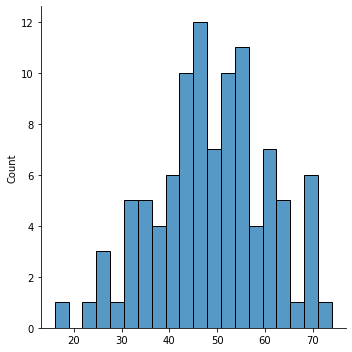

In [5]:
sns.displot(sample, bins = 20)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

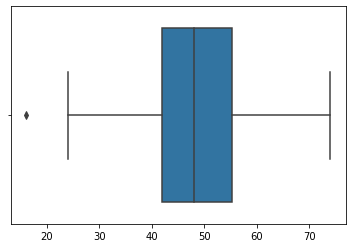

In [6]:
sns.boxplot(sample)

In [7]:
ser = pd.Series(sample)

In [8]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [9]:
IQR = 55.25 - 42.00
lower_limit = 42.0 - 1.5*(IQR)

In [10]:
lower_limit

22.125

In [11]:
ser[ser>lower_limit]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [12]:
np.percentile(sample,[75])

array([55.25])

In [13]:
q75, q25 = np.percentile(sample,[75, 25])
iqr = q75-q25

In [14]:
q25-1.5*iqr

22.125

In [15]:
df = pd.read_csv('Ames_Housing_Data.csv')

In [16]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2929.0,4.426296e+02,4.555908e+02,0.0,0.000000e+00,370.0,7.340000e+02,5.644000e+03


In [18]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

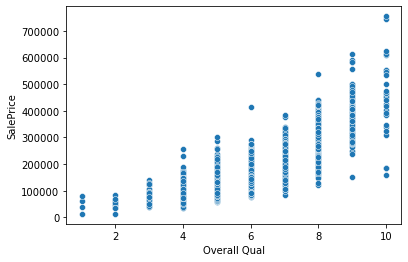

In [19]:
sns.scatterplot(x = 'Overall Qual', y = 'SalePrice', data = df)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

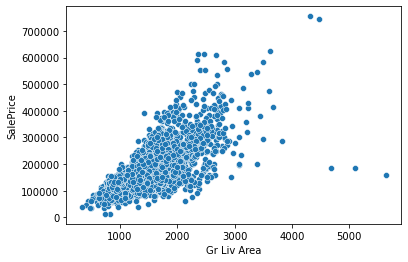

In [20]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', data = df)

In [21]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [22]:
drop_ind = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [23]:
df = df.drop(drop_ind, axis = 0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

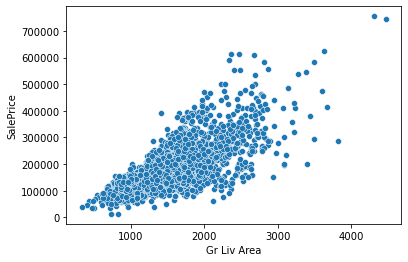

In [24]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', data = df)

 # Dealing With Missing data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
with open('Ames_Housing_Feature_Description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [27]:
df =  pd.read_csv("Ames_outliers_removed.csv")

In [28]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [30]:
df.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.927000e+03,2927.000000,2437.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2904.000000,2926.000000,...,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,7.142660e+08,57.398360,69.075503,10109.374786,6.090878,5.563717,1971.319098,1984.241886,101.044077,439.011620,...,93.517253,47.178340,23.035190,2.595149,16.018449,2.081654,44.879057,6.215237,2007.790912,180800.770755
std,1.887256e+08,42.654221,22.787266,7782.875751,1.406195,1.111960,30.238491,20.856725,177.098747,439.355775,...,126.112082,66.551515,64.167697,25.154079,56.113774,34.502476,472.078028,2.712368,1.317120,79926.657275
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,58.000000,7439.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071801e+08,70.000000,80.000000,11523.000000,7.000000,6.000000,2000.500000,2004.000000,164.000000,734.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000,755000.000000


In [31]:
df = df.drop("PID", axis =1 )

In [32]:
len(df.columns)

80

In [33]:
100* df.isnull().sum()  / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [34]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0]. sort_values()
    return percent_nan

In [35]:
percent_nan = percent_missing(df)

In [36]:
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

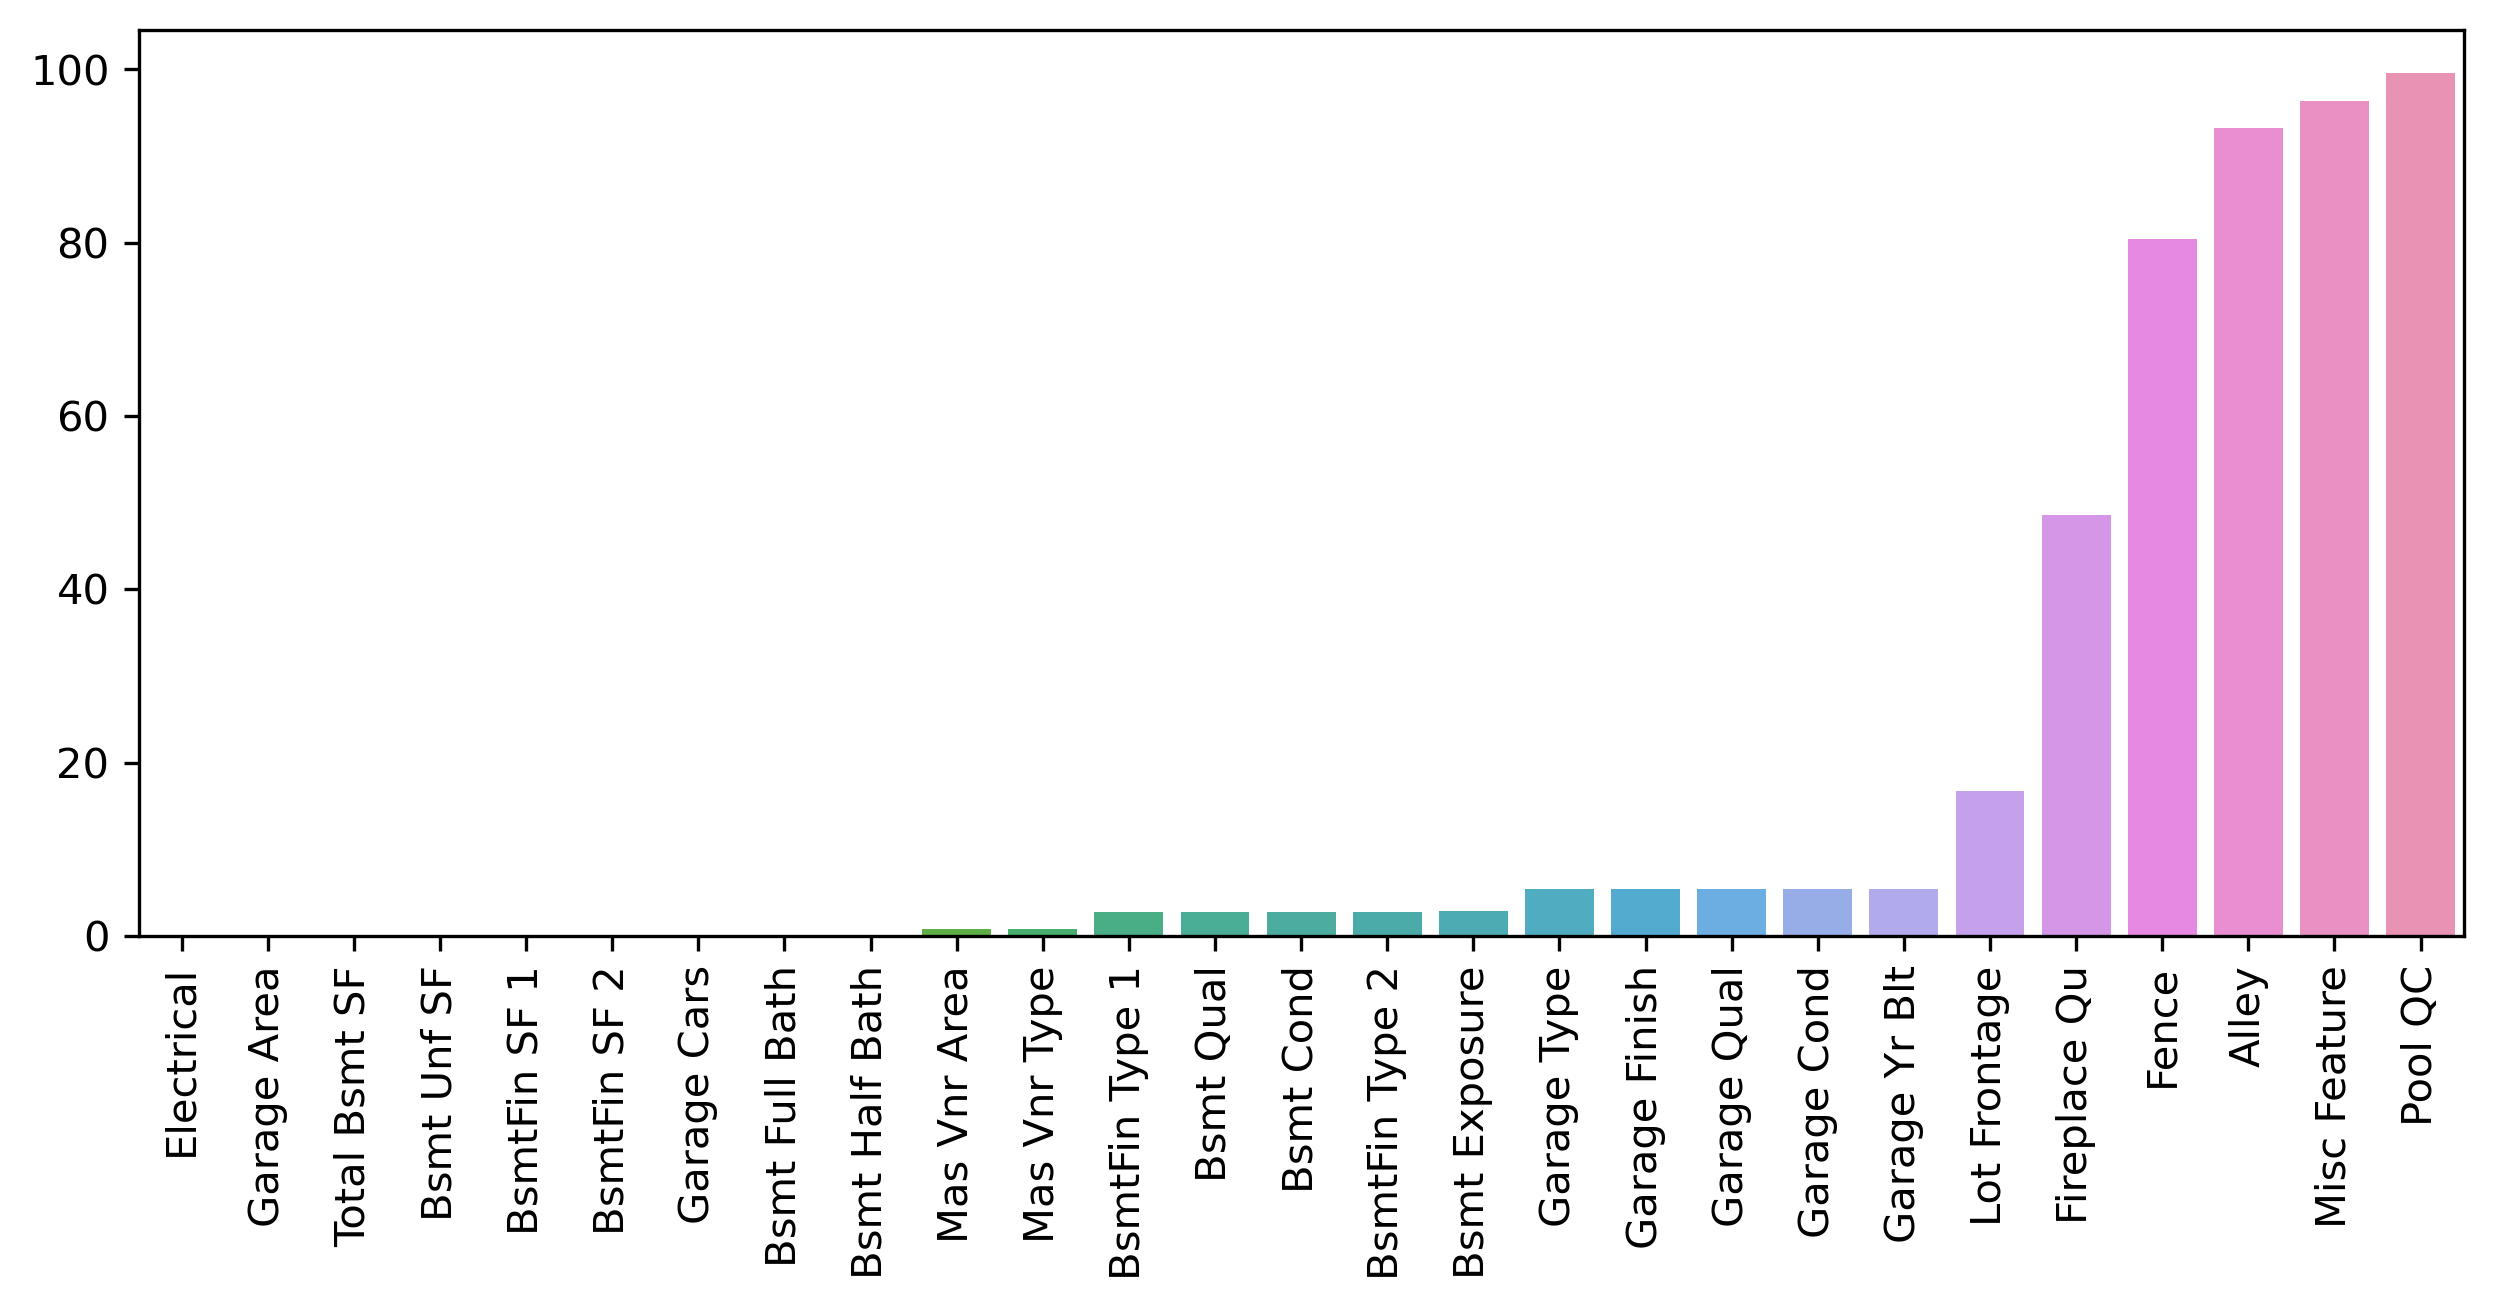

In [37]:
plt.figure(figsize=(10,4), dpi = 300)
plt.xticks(rotation = 90)
sns.barplot(x = percent_nan.index, y = percent_nan);

(0.0, 1.0)

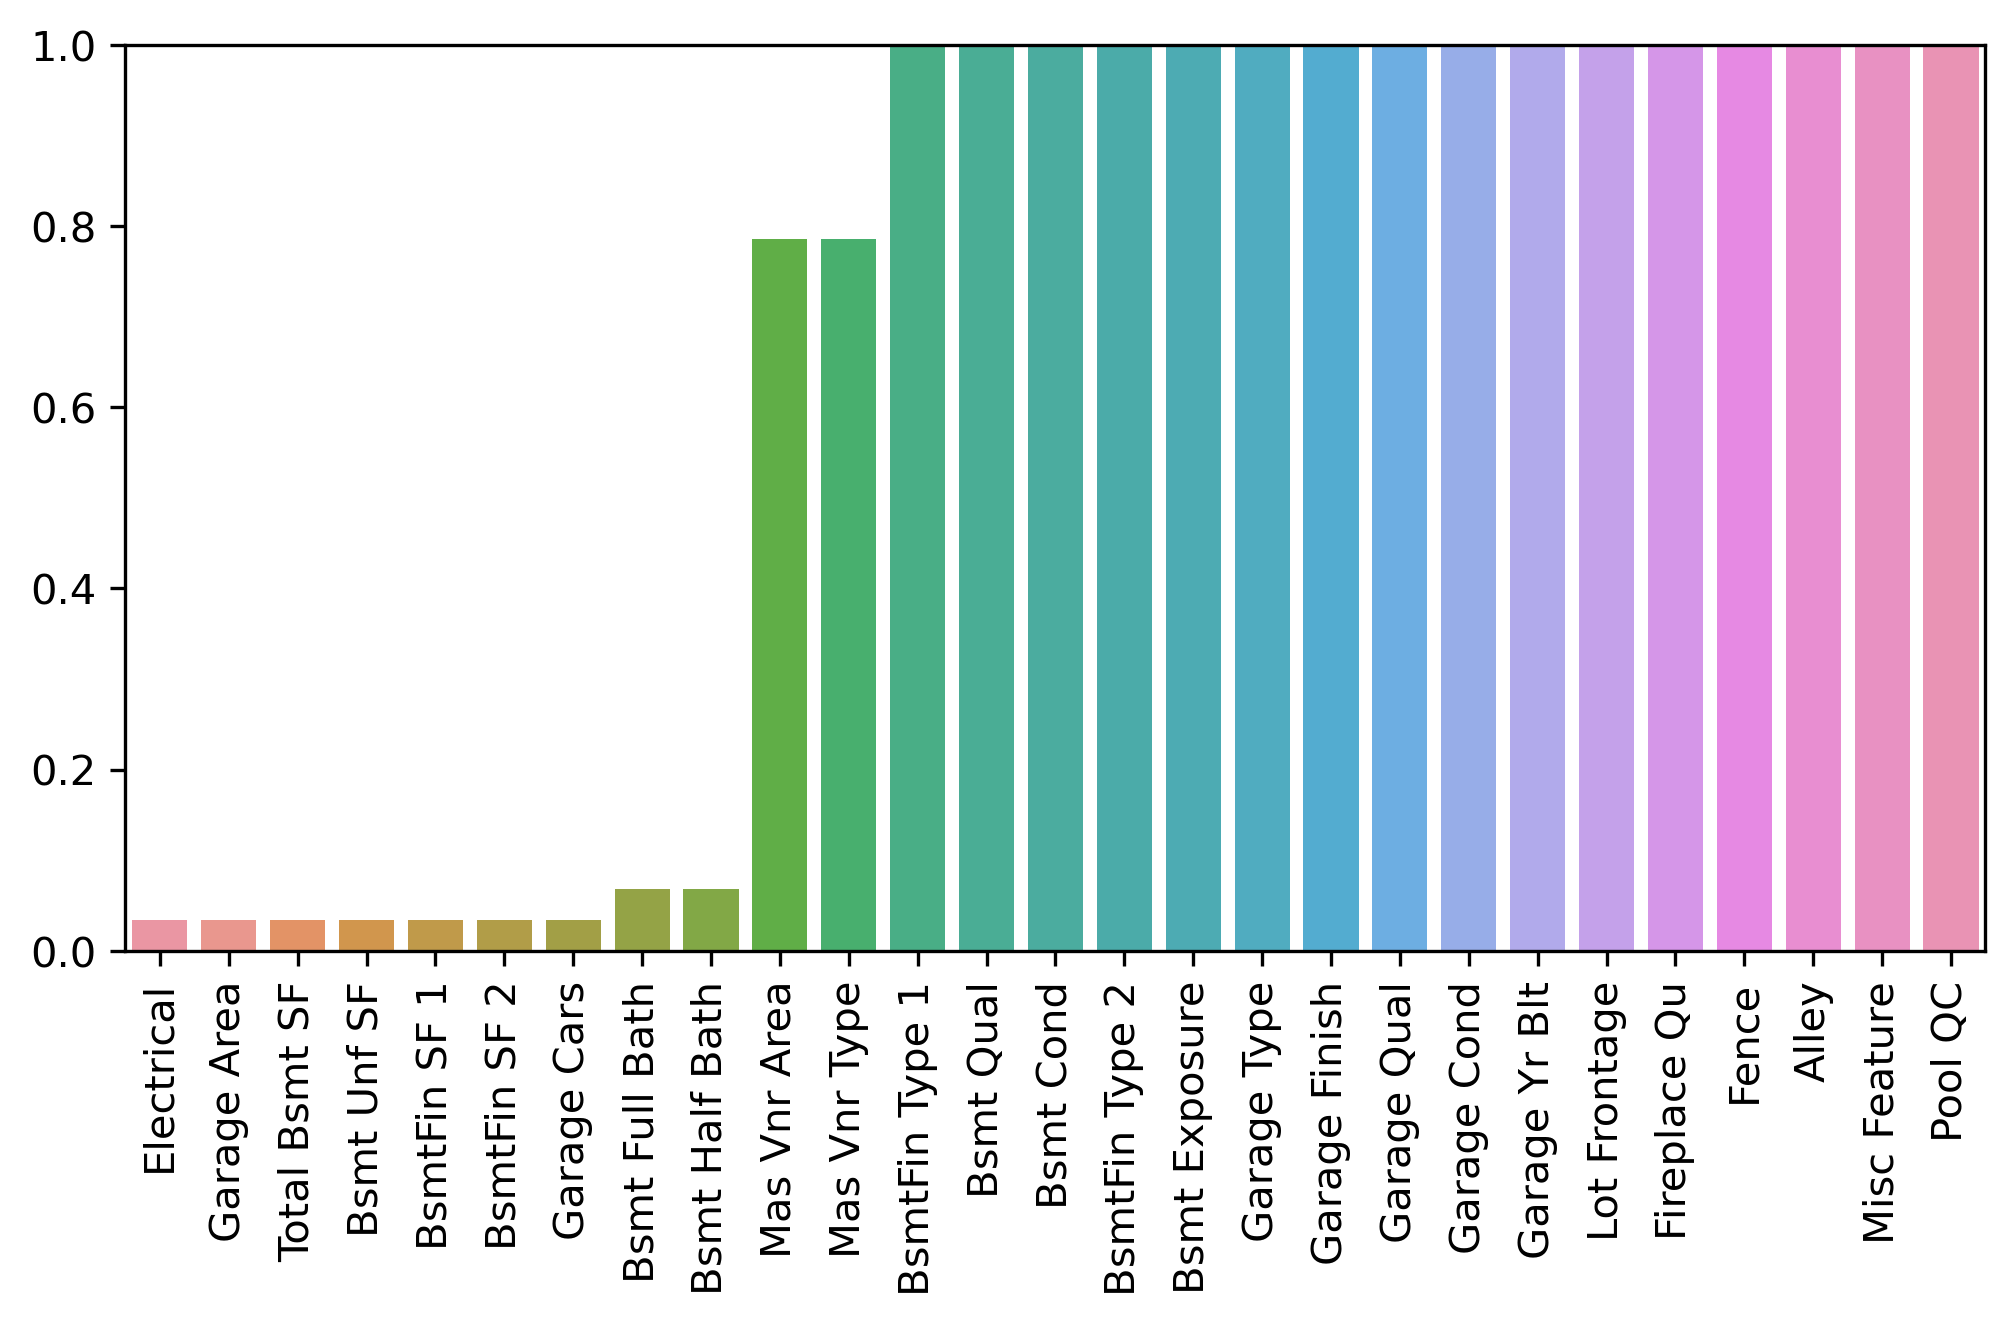

In [38]:
plt.figure(figsize = (8,4), dpi = 300)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1)

In [39]:
percent_nan[percent_nan<1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [40]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [41]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [42]:
df = df.dropna(axis = 0, subset = ['Electrical', 'Garage Cars'])

In [43]:
precent_nan = percent_missing(df)

In [44]:
precent_nan[percent_nan<1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

(0.0, 1.0)

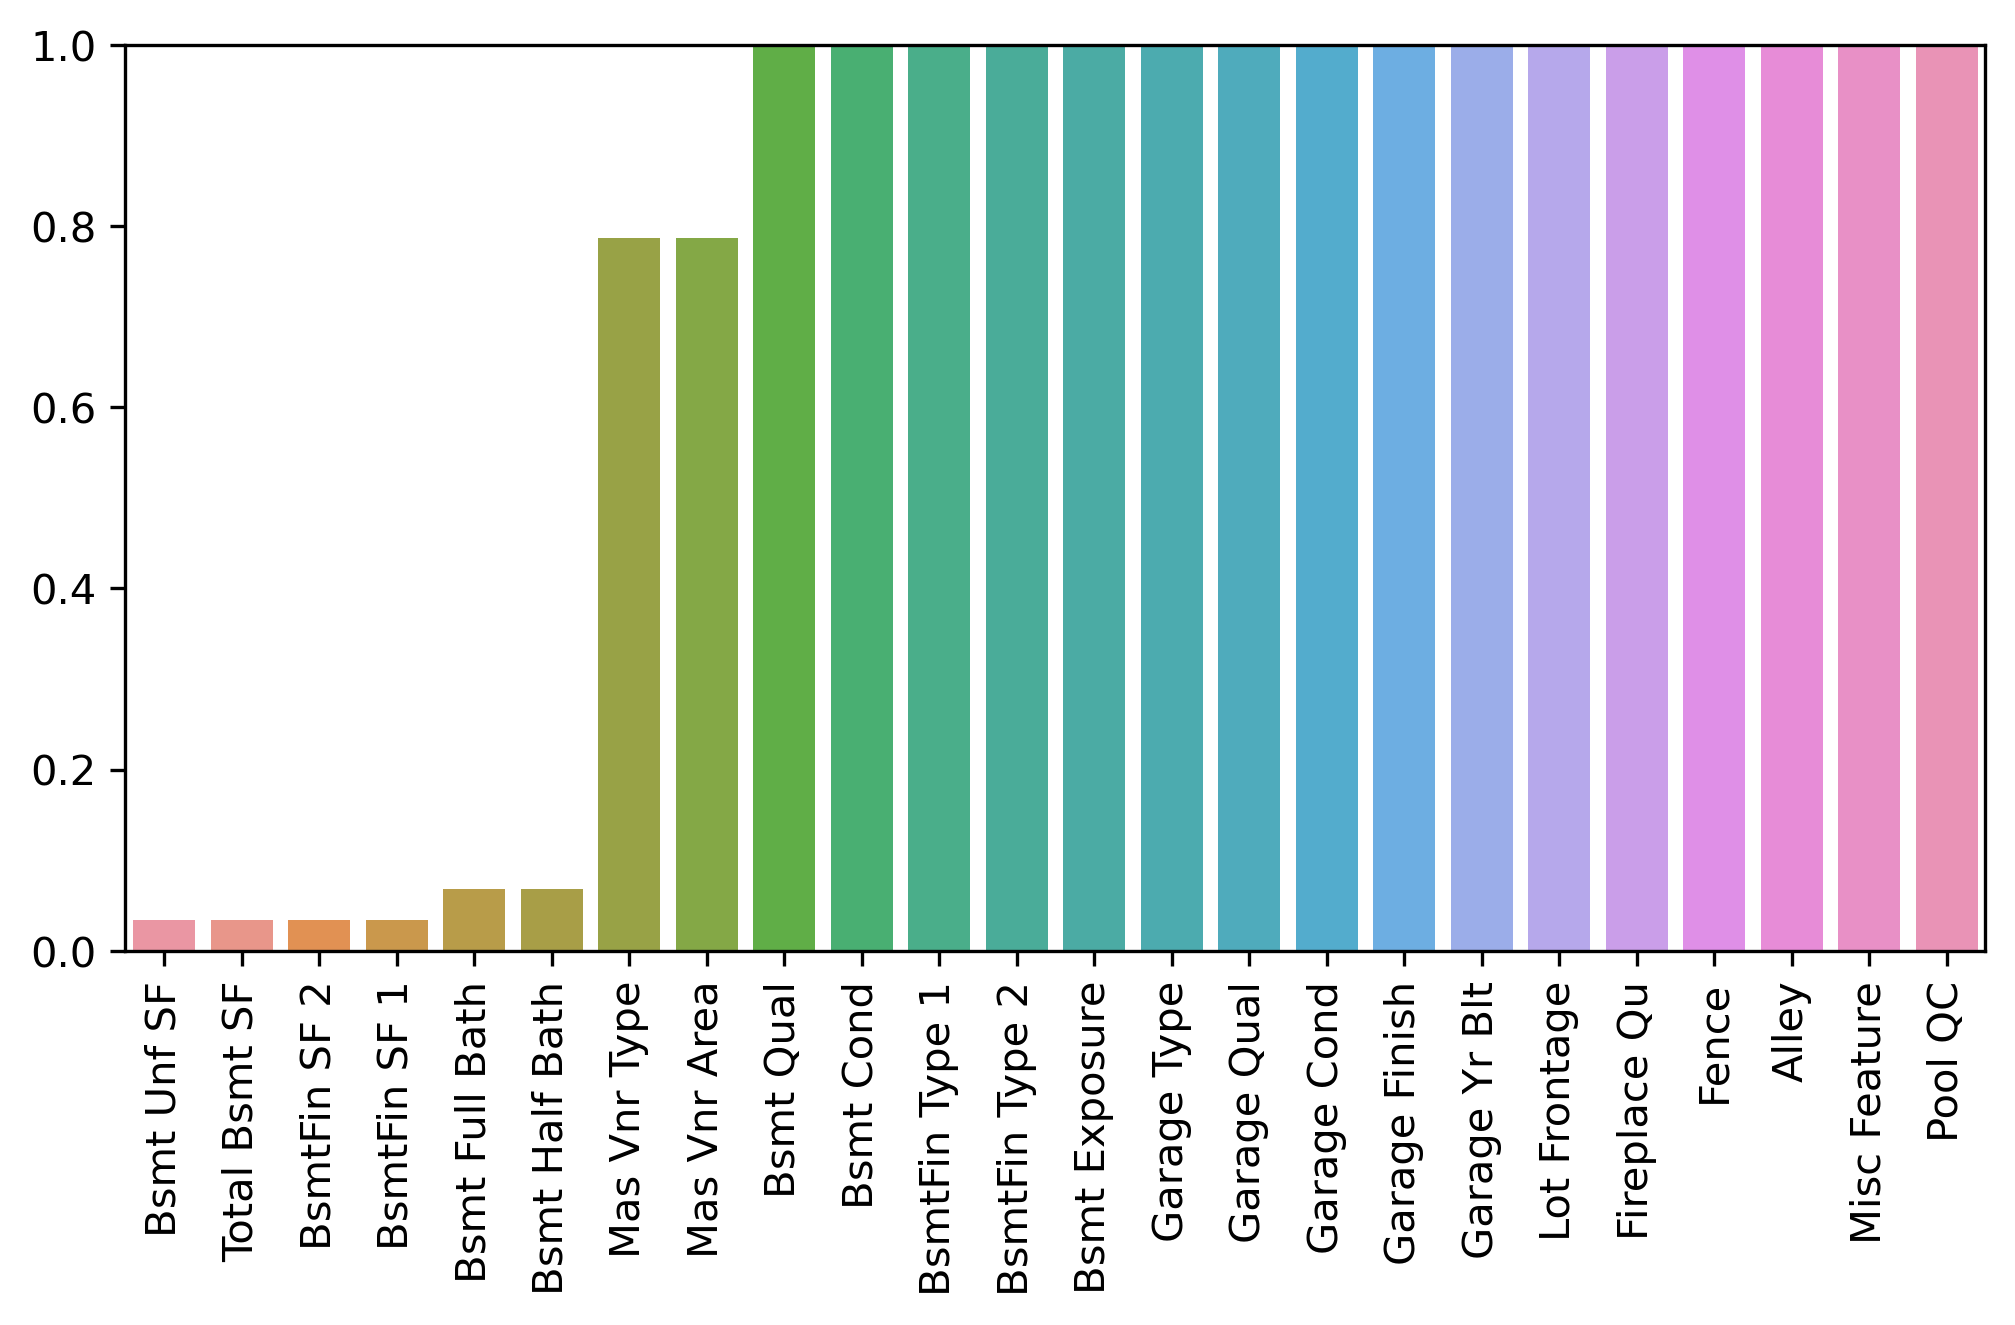

In [45]:
plt.figure(figsize = (8,4), dpi = 300)
sns.barplot(x = precent_nan.index, y = precent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1)

In [46]:
# BSMT NUMERIC COLUMNS --> fillna 0

bsmt_numeric_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']

df[bsmt_numeric_cols] = df[bsmt_numeric_cols].fillna(0)

# BSMT STRING COLUMNS
bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [47]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


(0.0, 1.0)

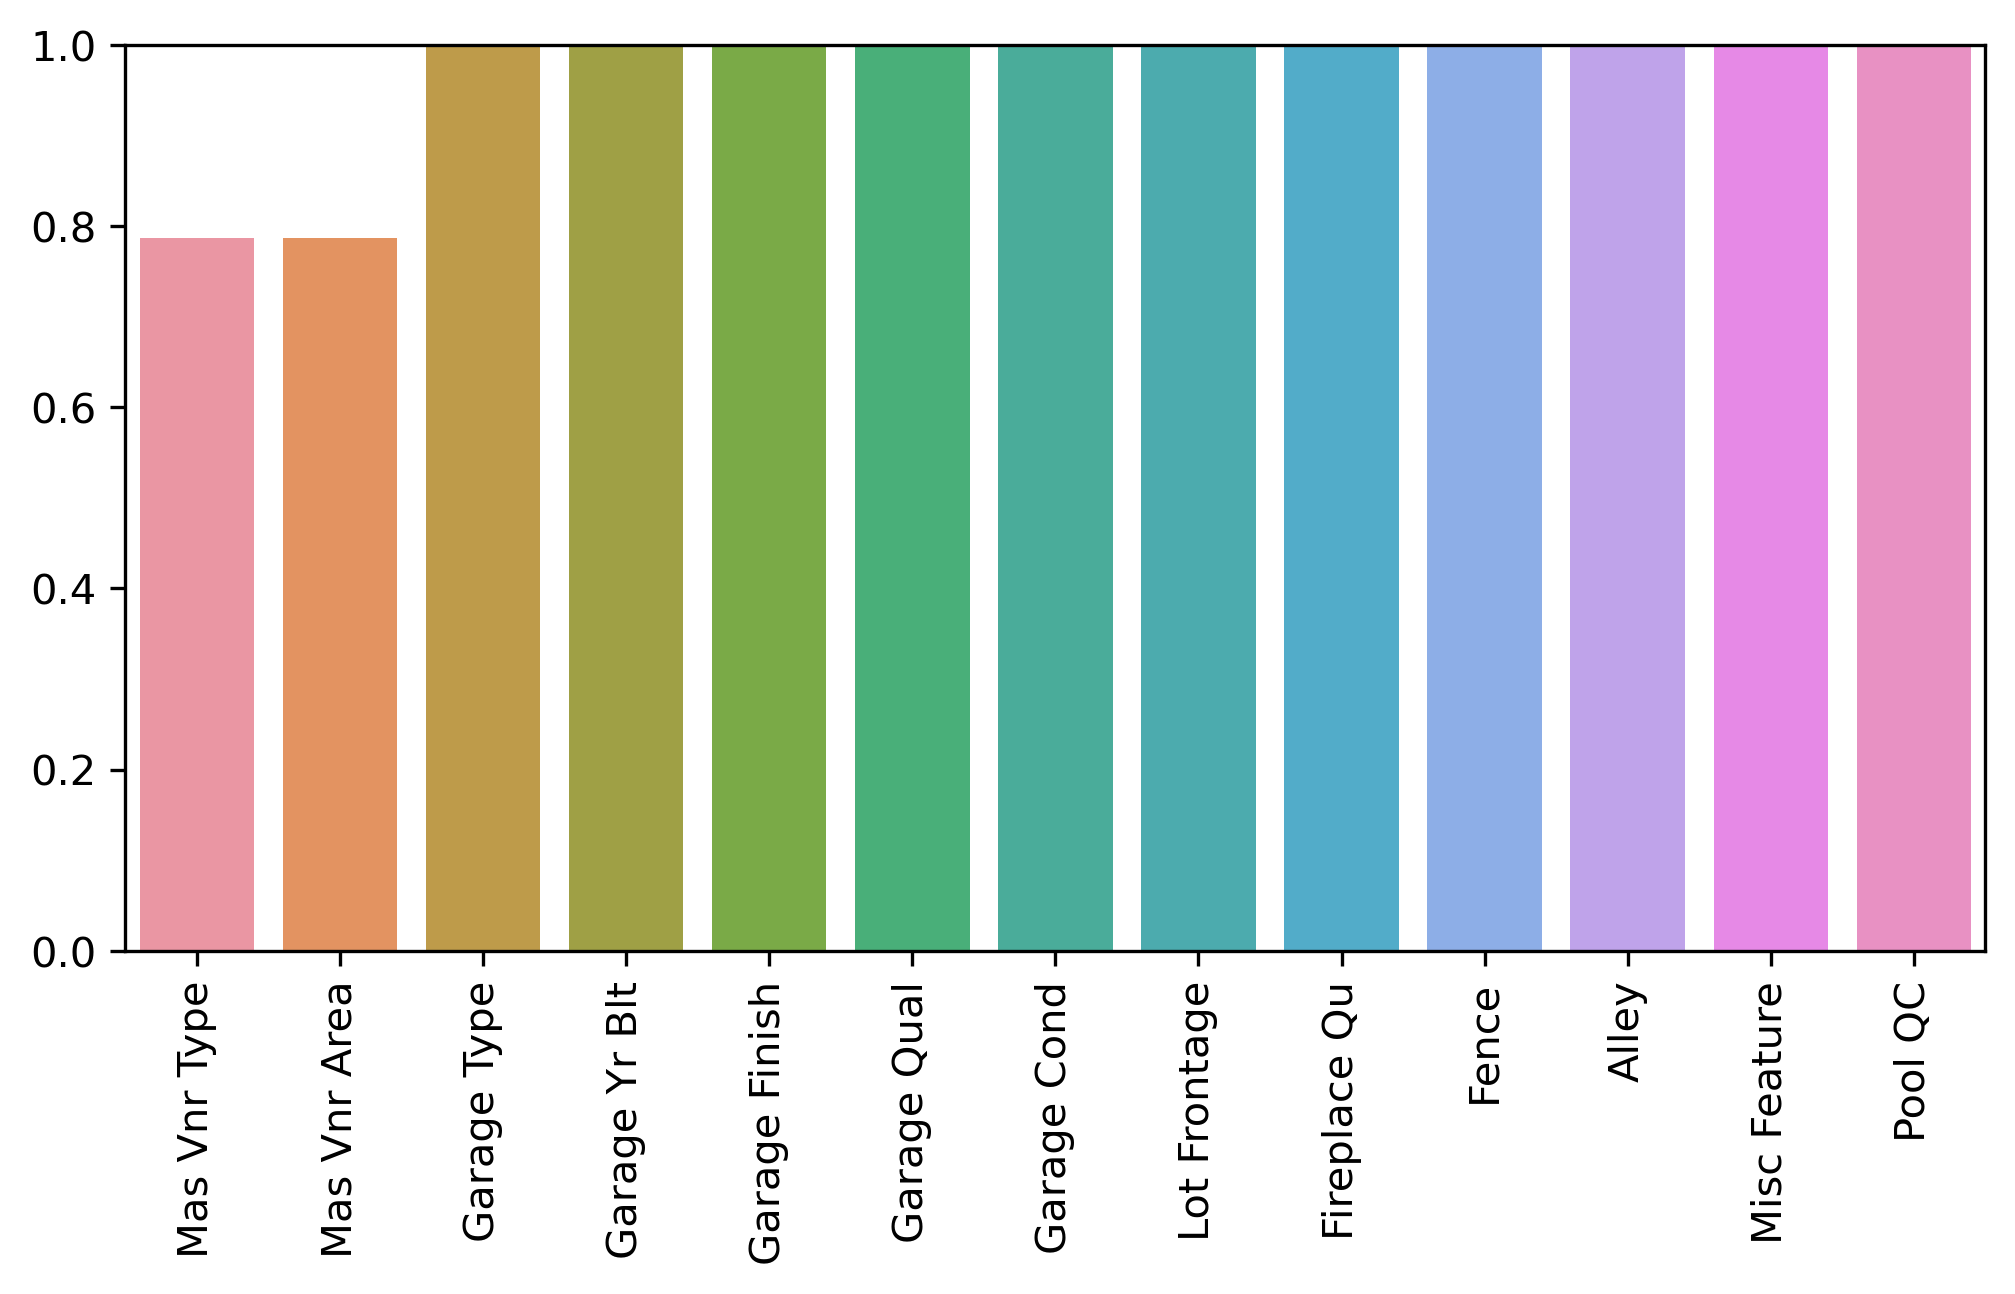

In [48]:
precent_nan =percent_missing(df)

plt.figure(figsize = (8,4), dpi = 300)
sns.barplot(x = precent_nan.index, y = precent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1)

In [49]:
df['Mas Vnr Type']=df['Mas Vnr Type'].fillna("None")

In [50]:
df['Mas Vnr Area']=df['Mas Vnr Area'].fillna(0)

(0.0, 1.0)

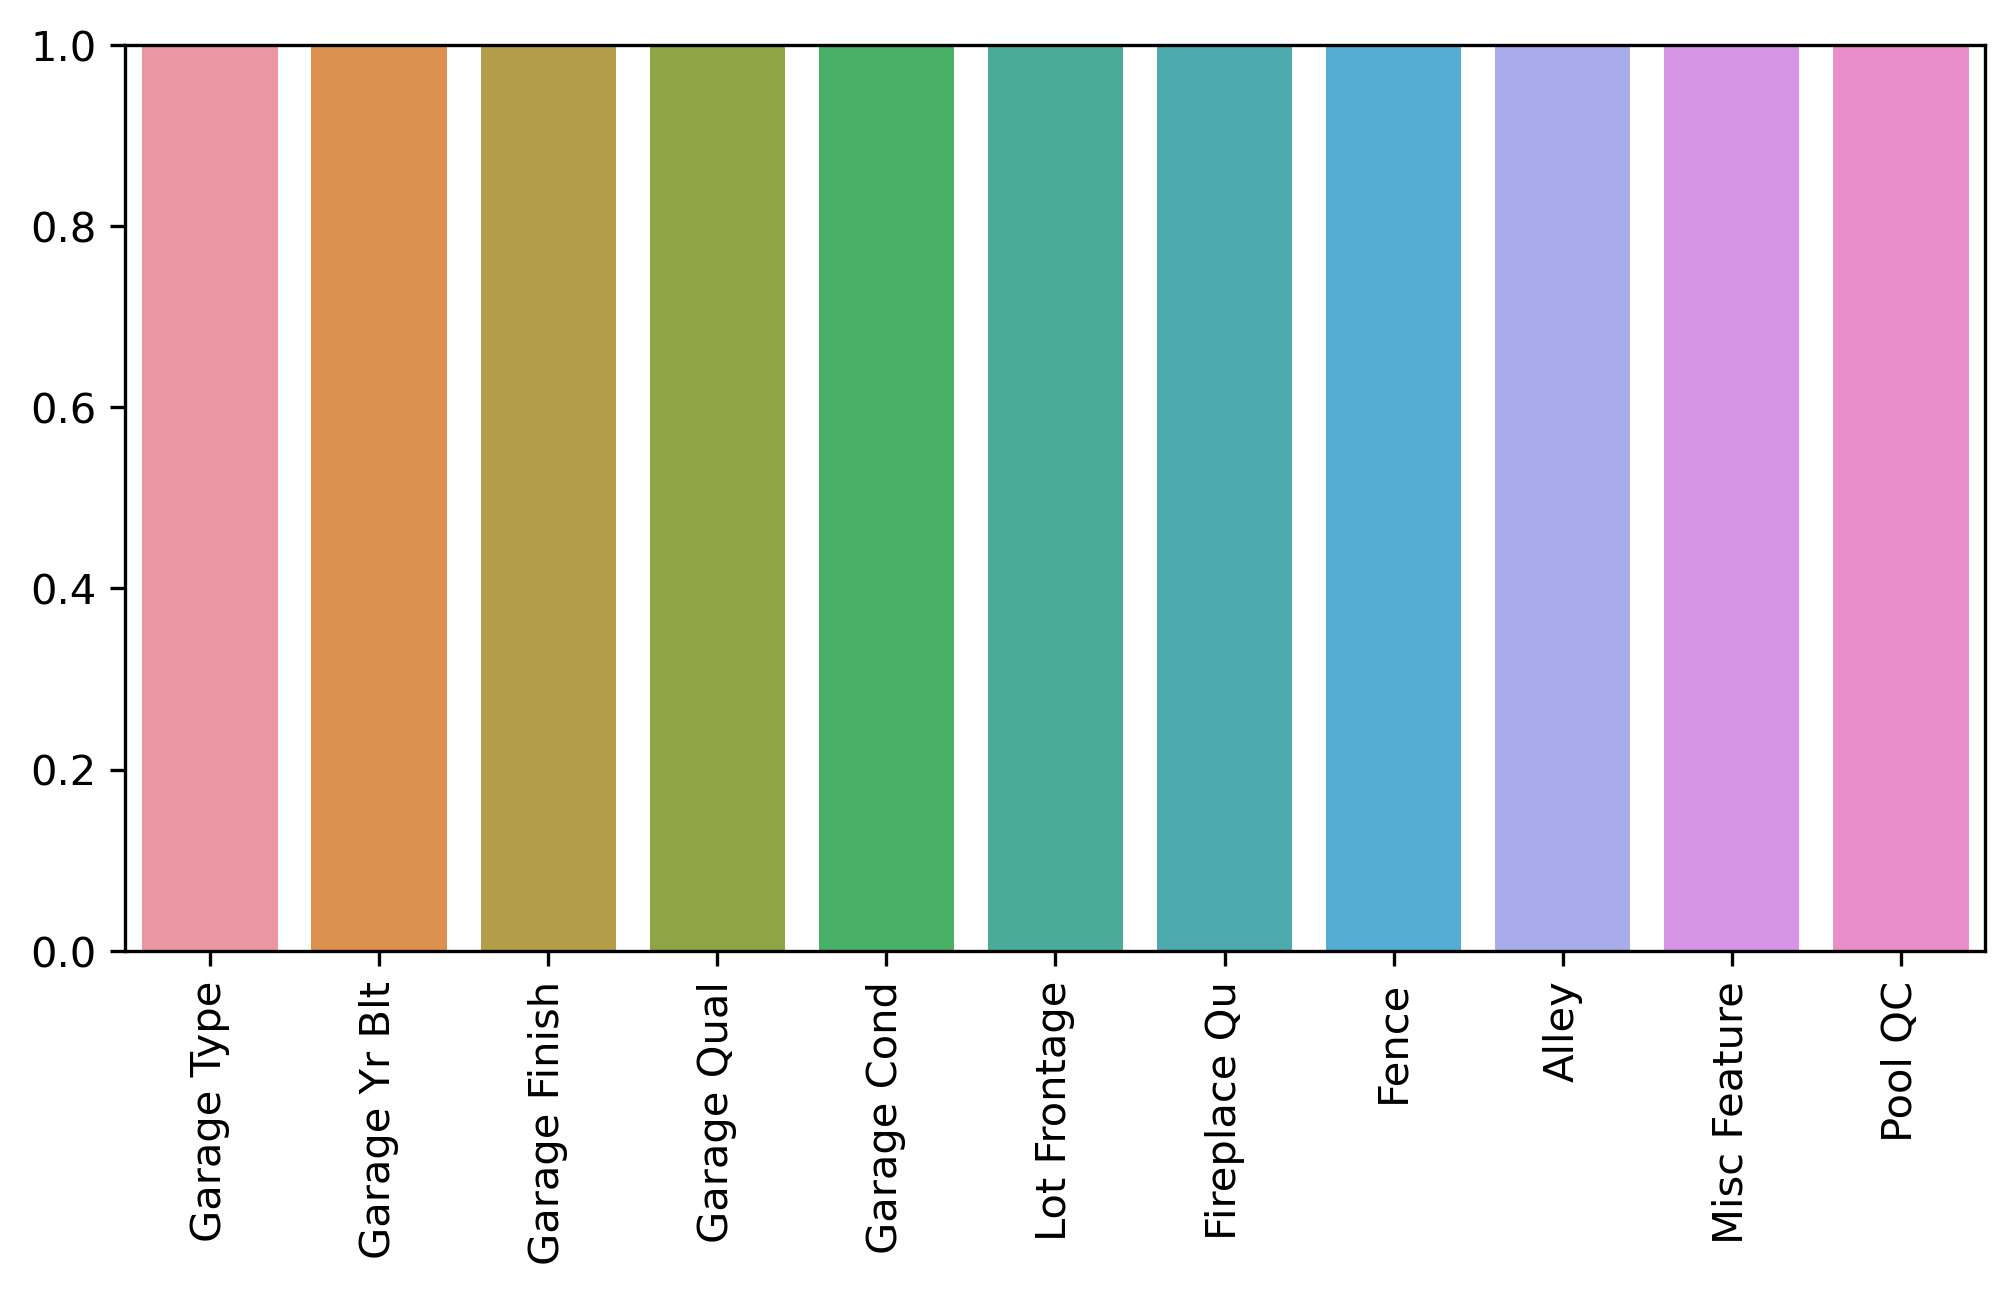

In [51]:
precent_nan =percent_missing(df)

plt.figure(figsize = (8,4), dpi = 300)
sns.barplot(x = precent_nan.index, y = precent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1)

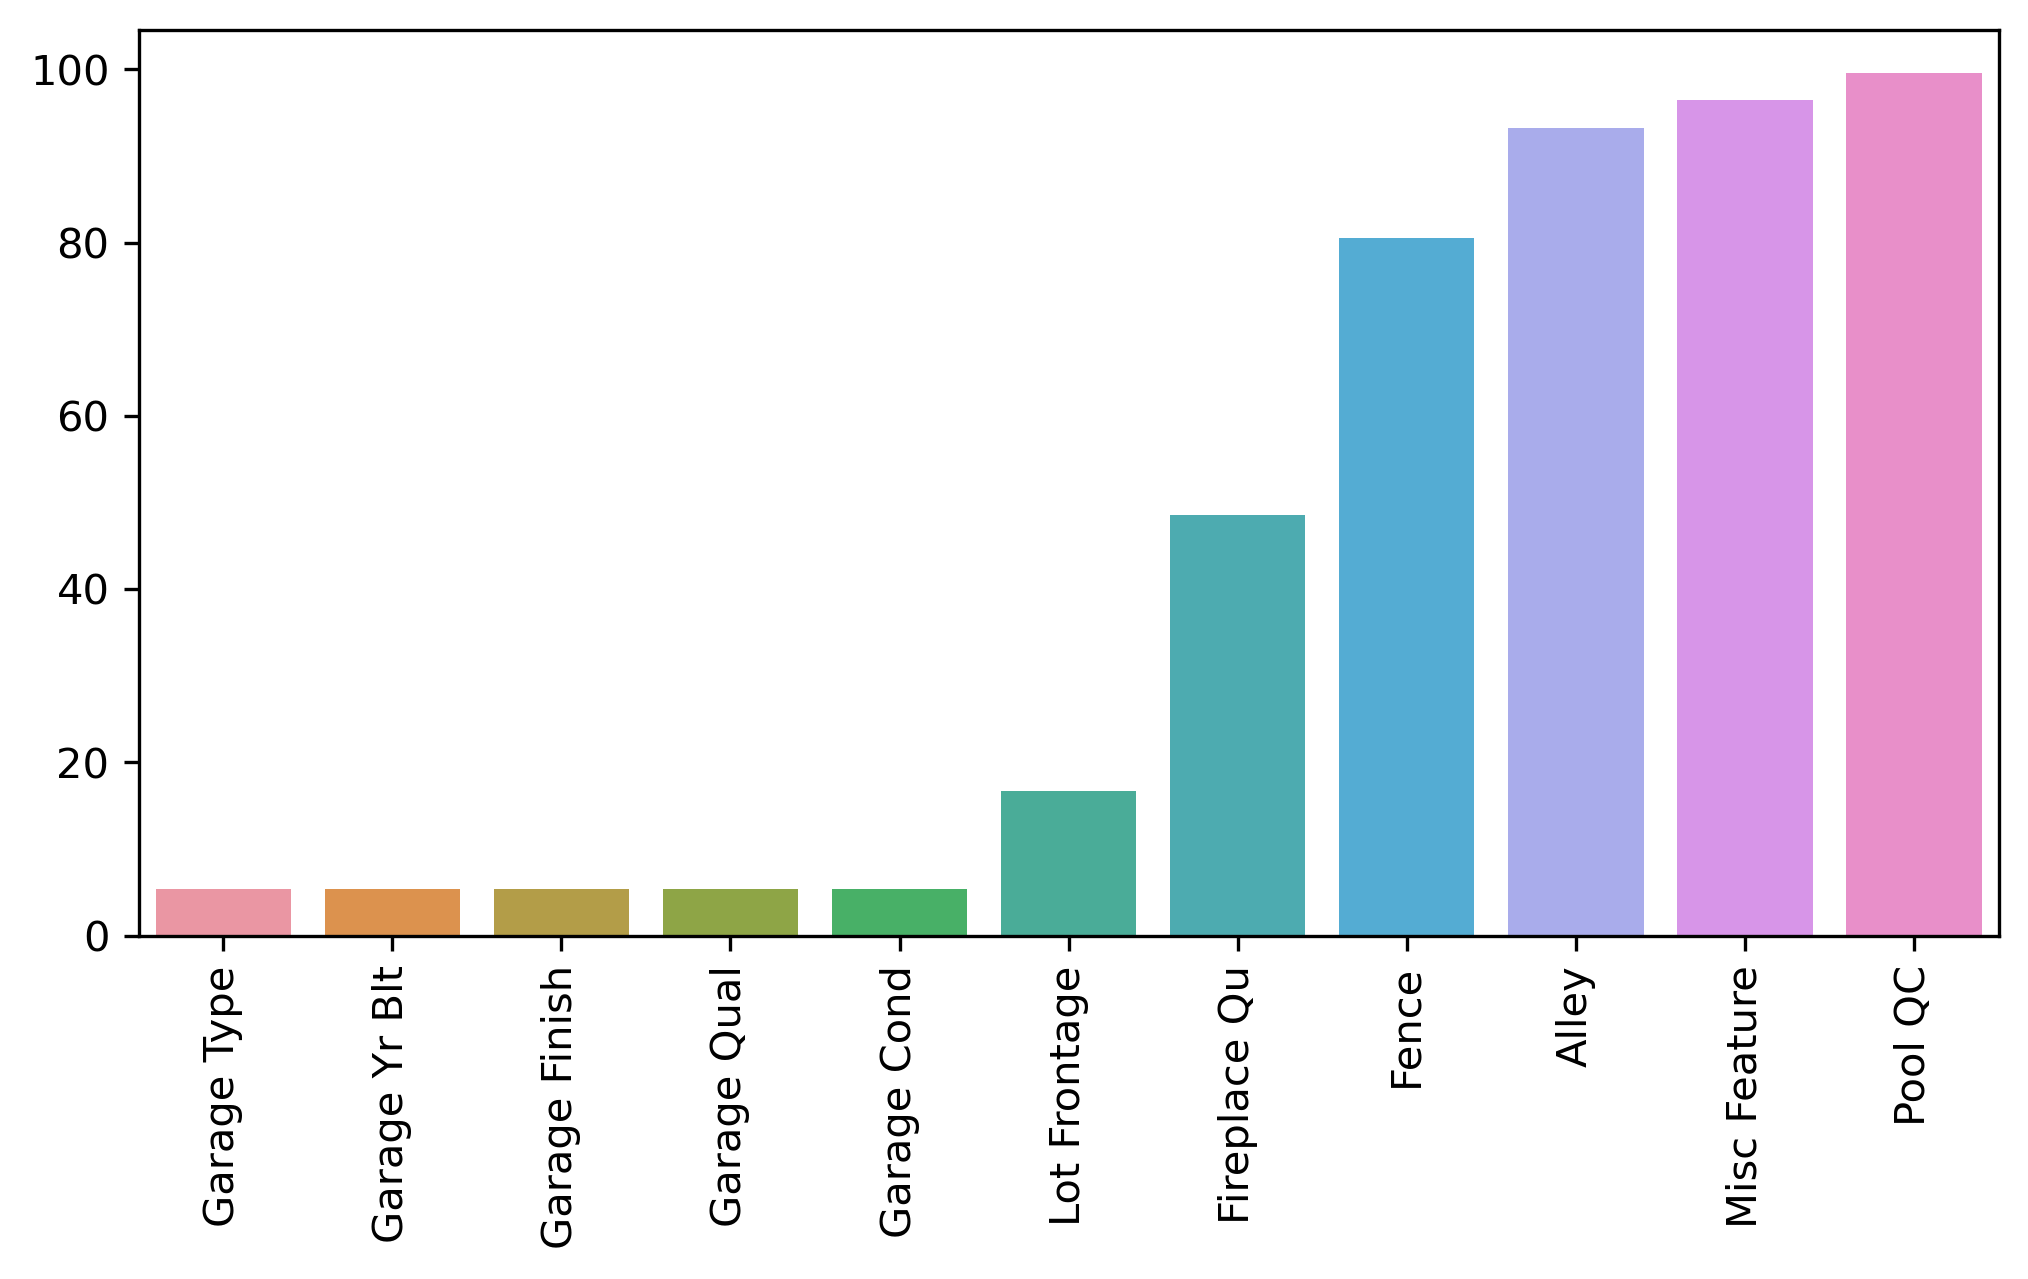

In [52]:
plt.figure(figsize = (8,4), dpi = 300)
sns.barplot(x = precent_nan.index, y = precent_nan)
plt.xticks(rotation = 90);

# Fixing Data Based On Columns

In [53]:
gar_str_cols = ['Garage Type','Garage Finish', 'Garage Qual', 'Garage Cond']

In [54]:
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [55]:
percent_nan = percent_missing(df)

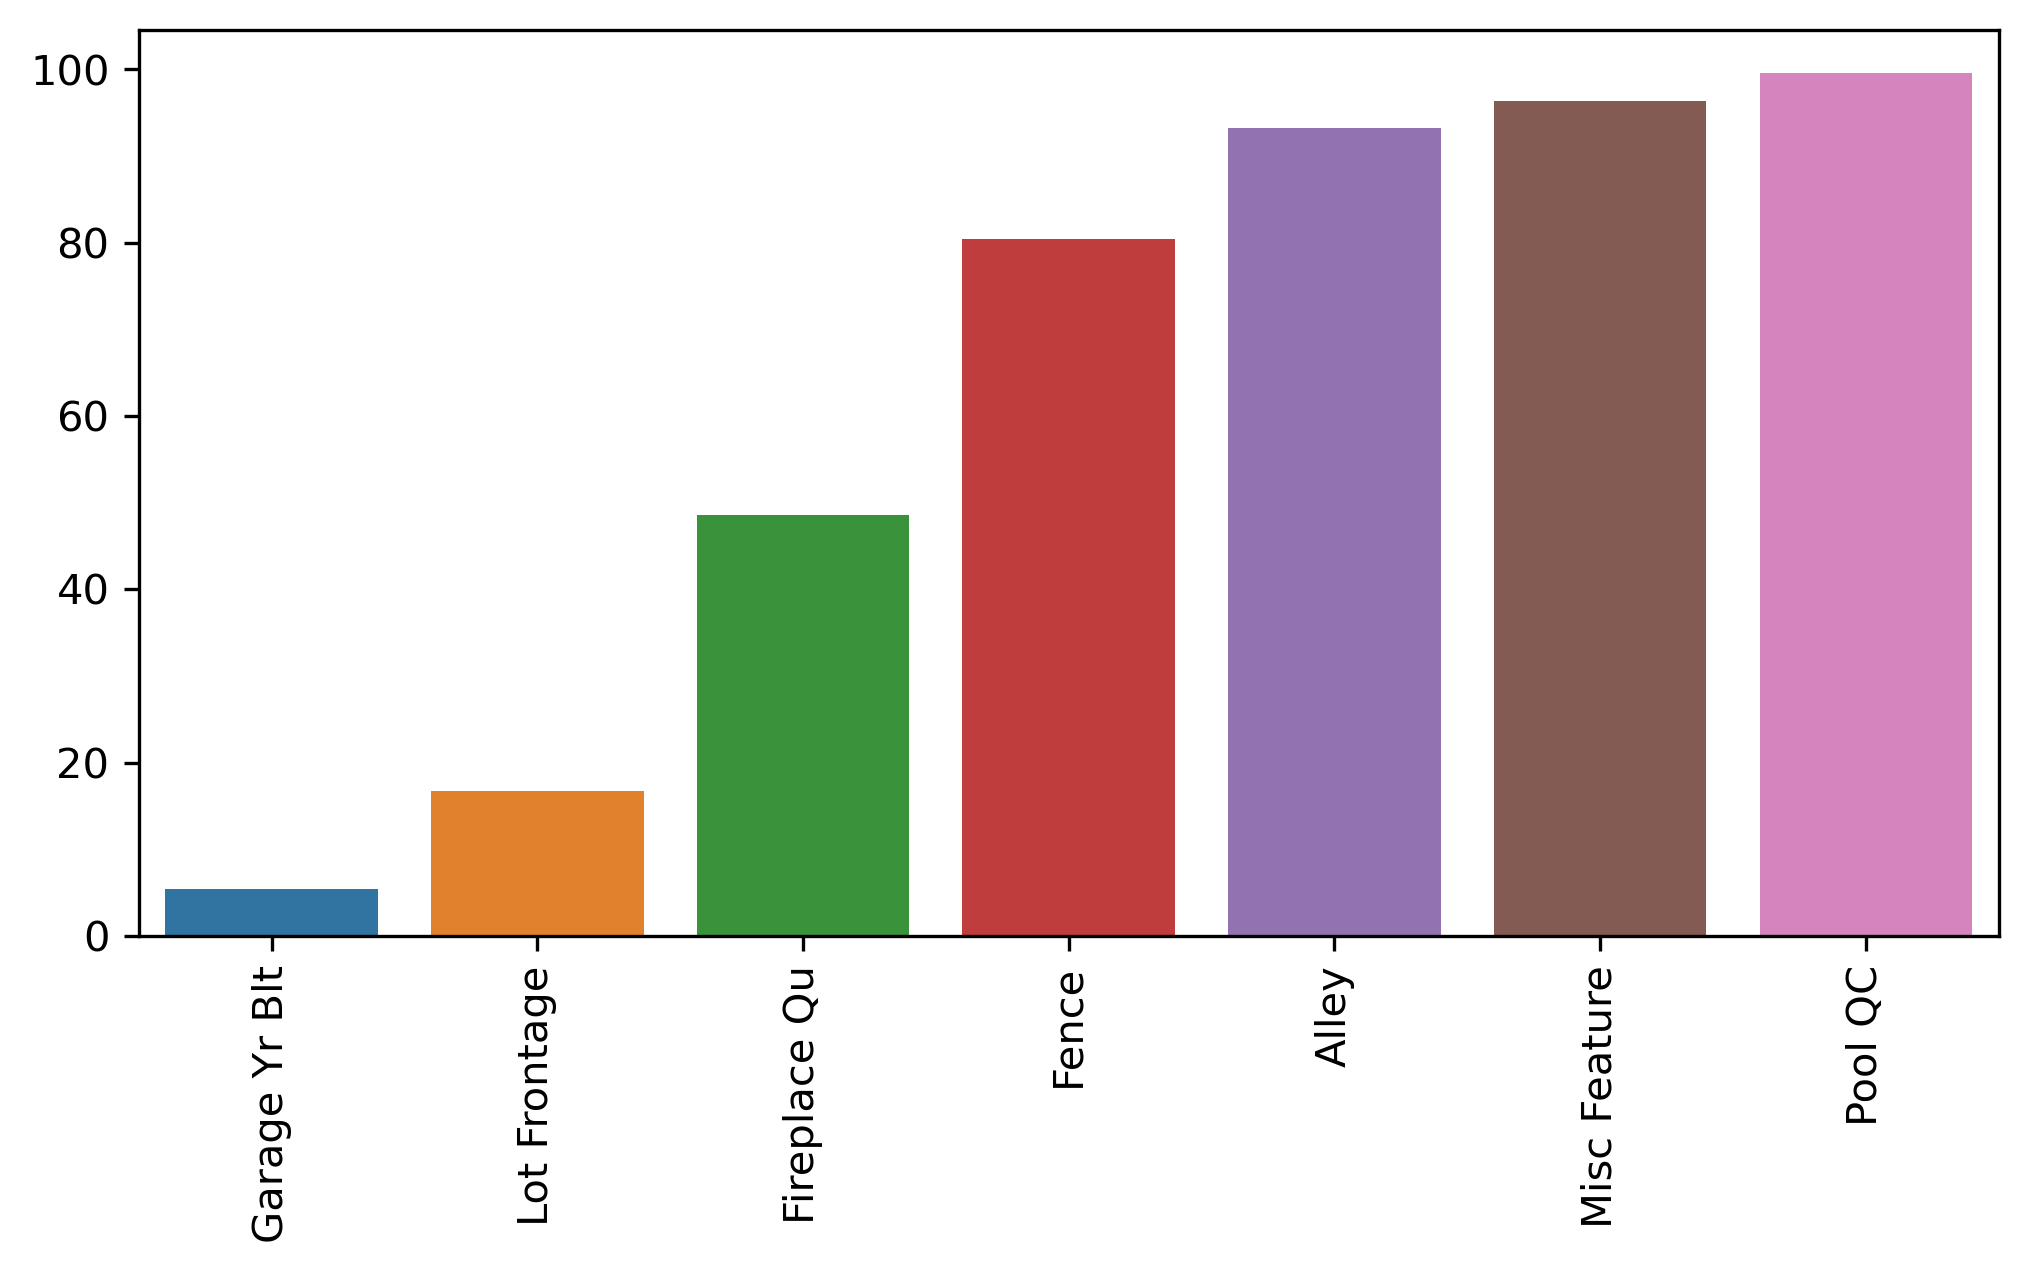

In [56]:
plt.figure(figsize = (8,4), dpi = 300)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);

In [57]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [58]:
percent_nan = percent_missing(df)

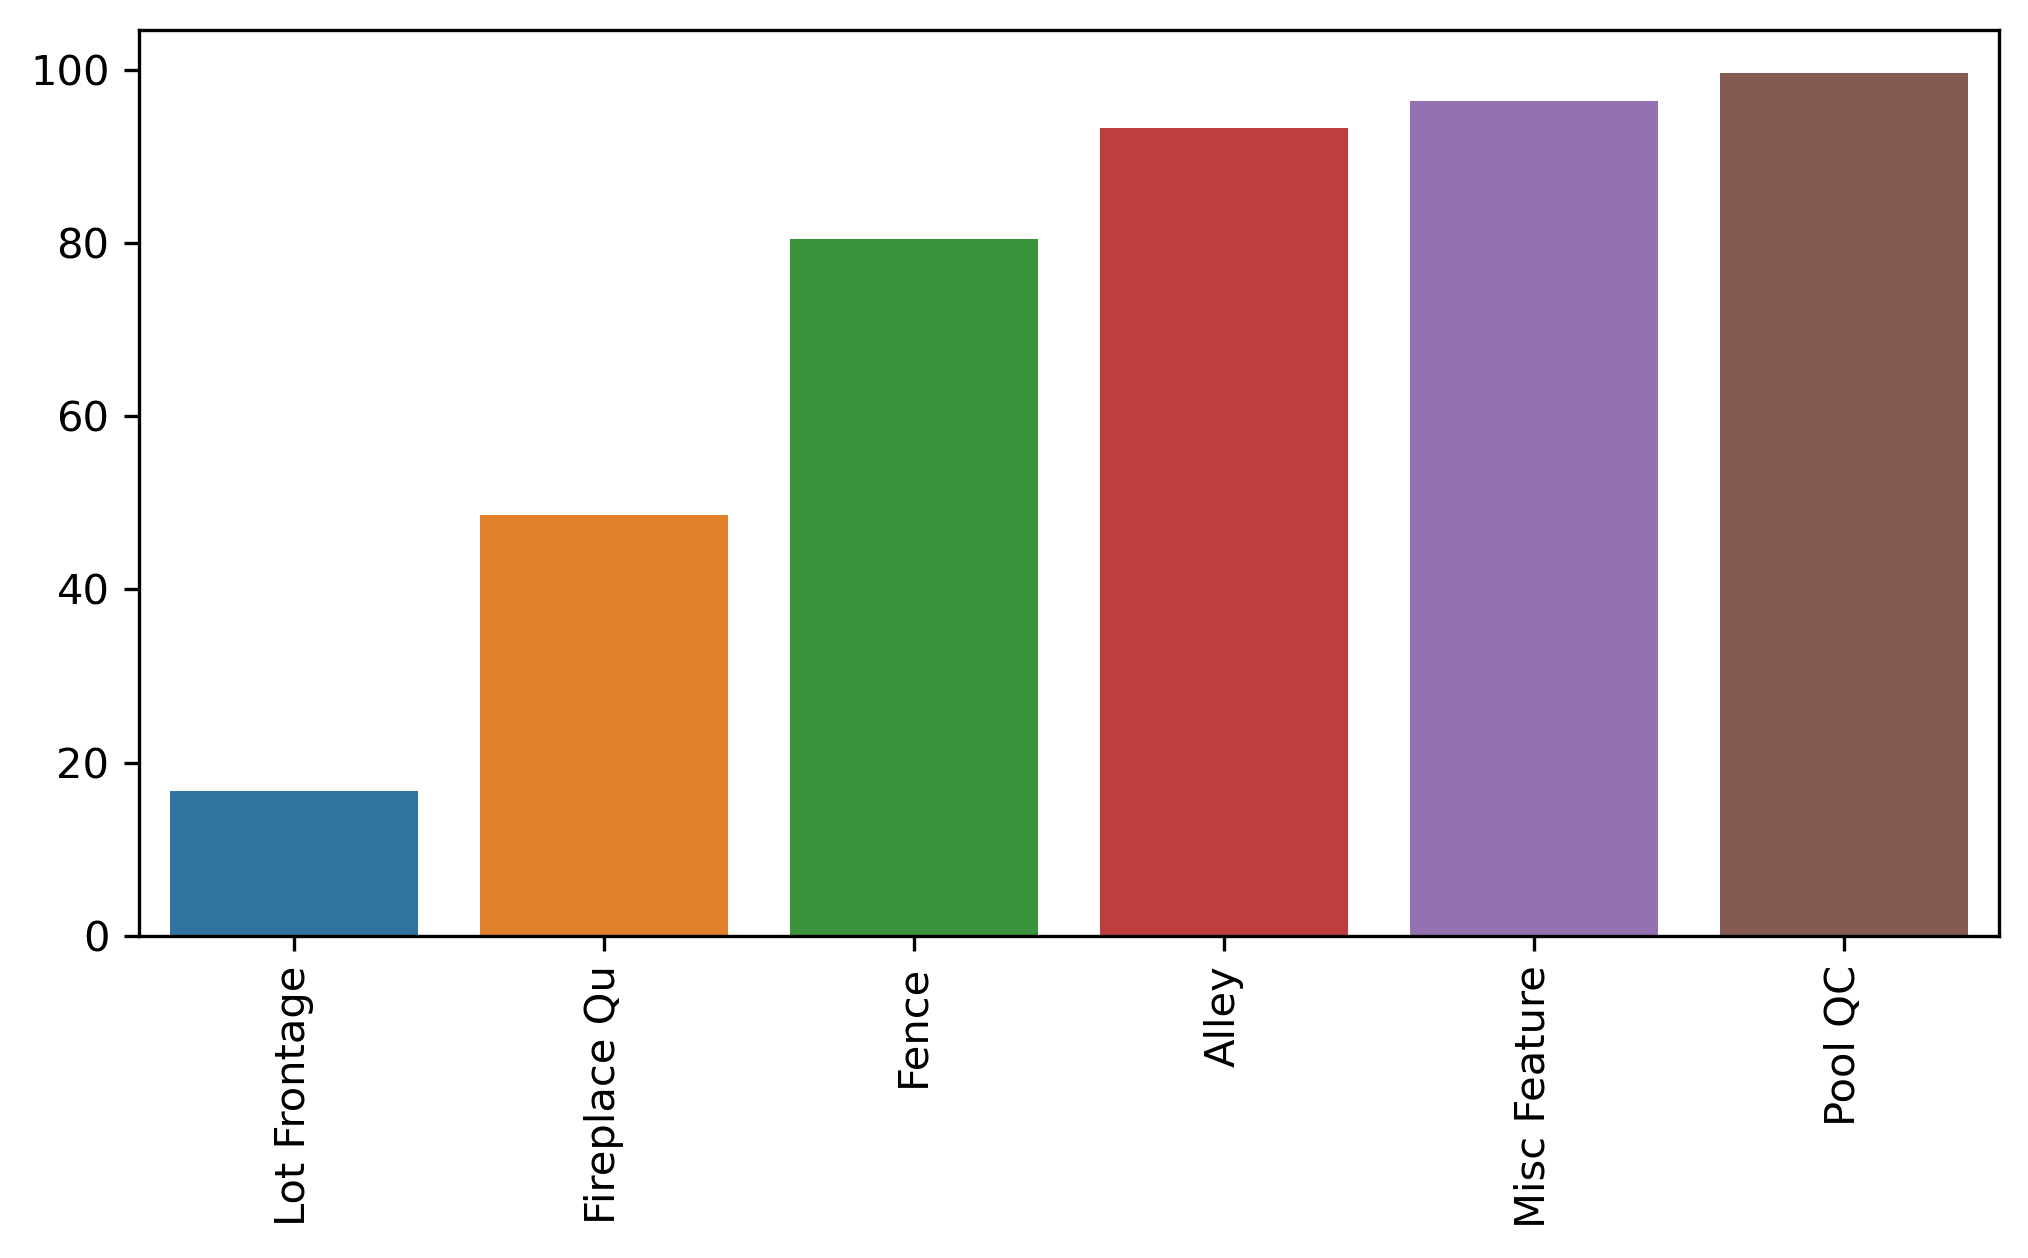

In [59]:
plt.figure(figsize = (8,4), dpi = 300)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);

In [60]:
df = df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'],axis = 1)

In [61]:
percent_nan = percent_missing(df)

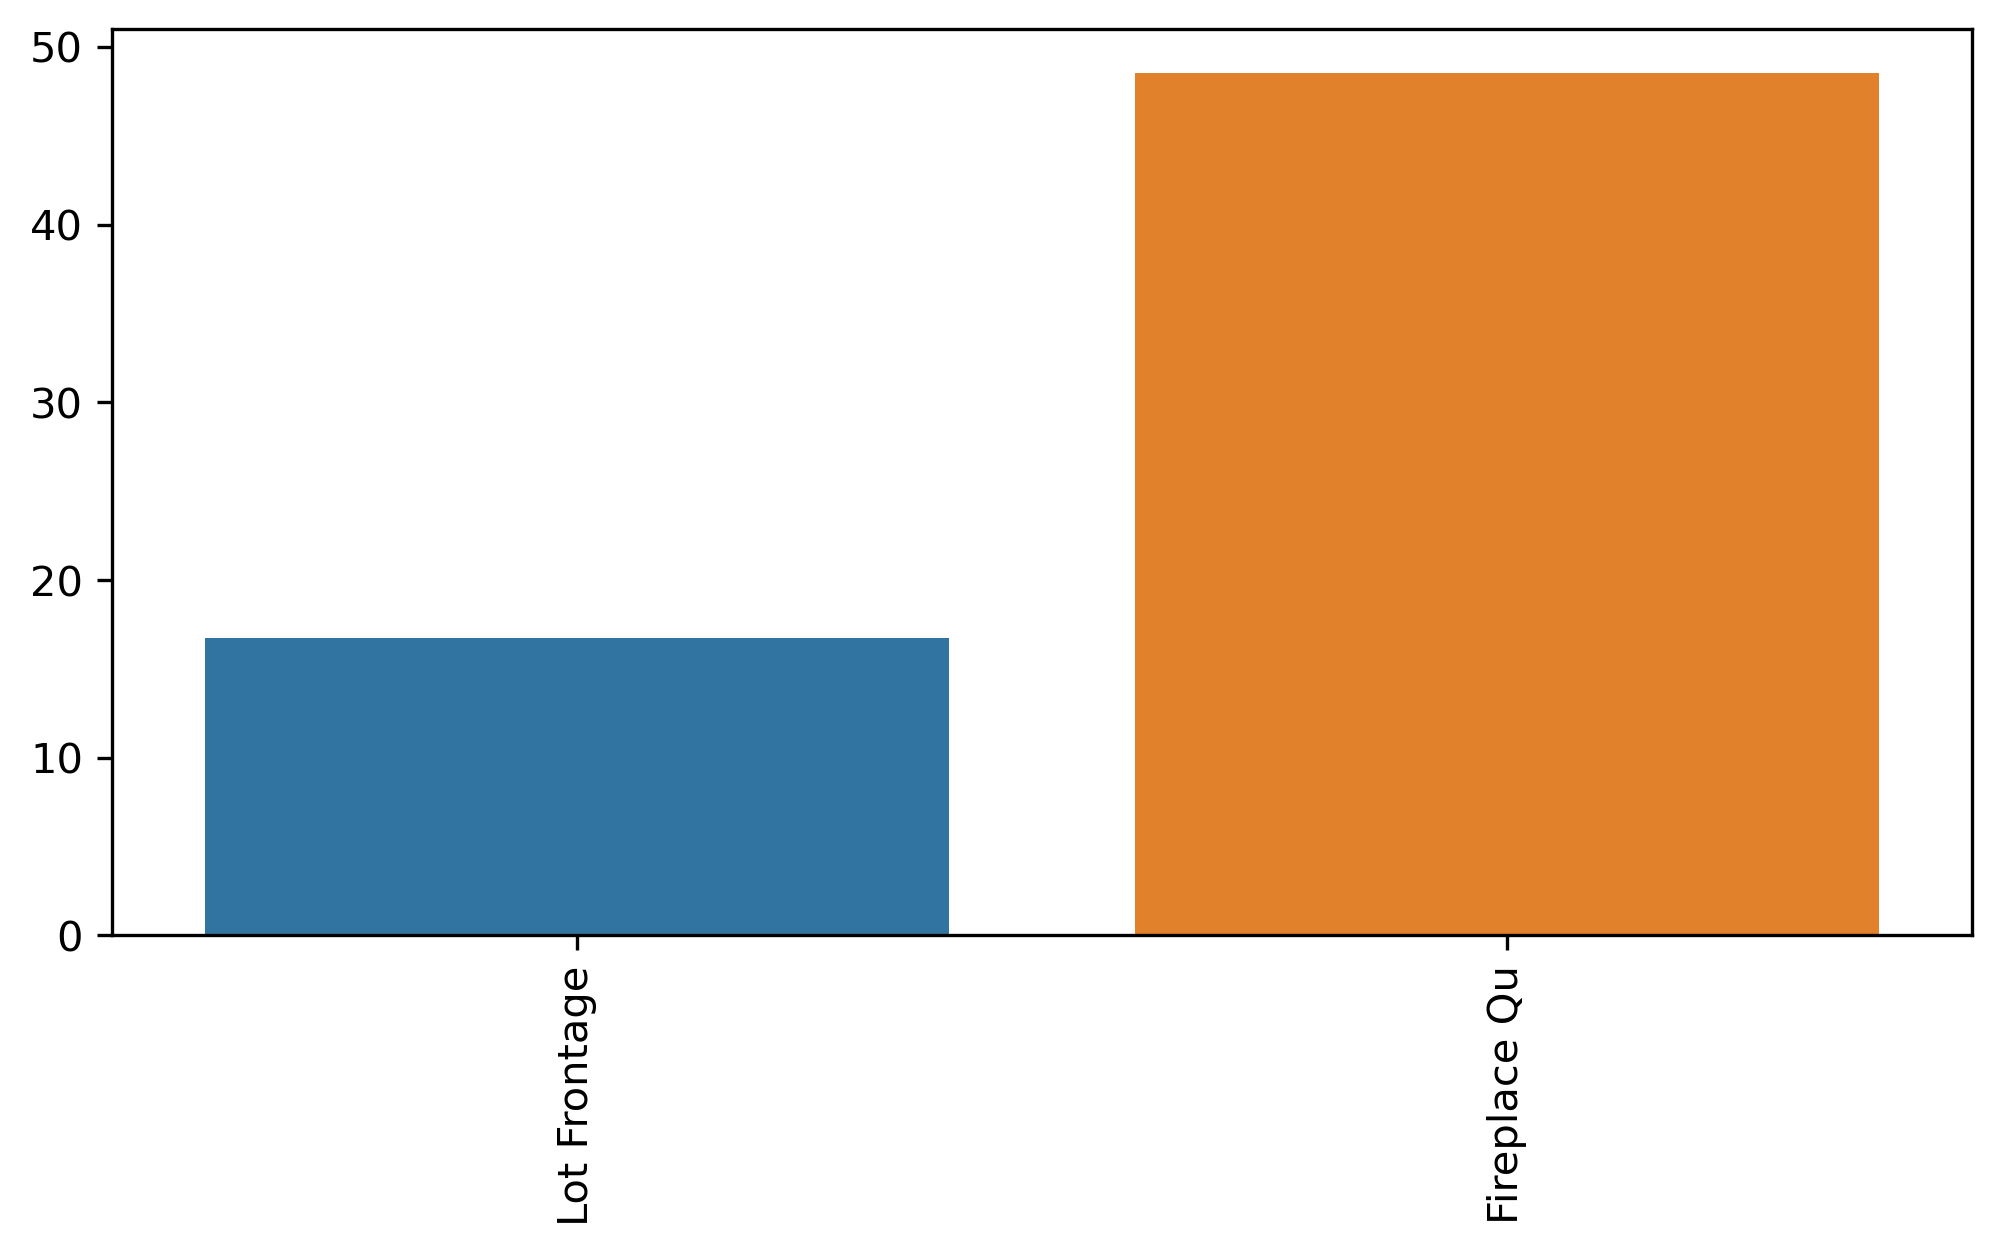

In [62]:
plt.figure(figsize = (8,4), dpi = 300)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);

In [63]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [64]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [65]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2922     37.0
2923      NaN
2924     62.0
2925     77.0
2926     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

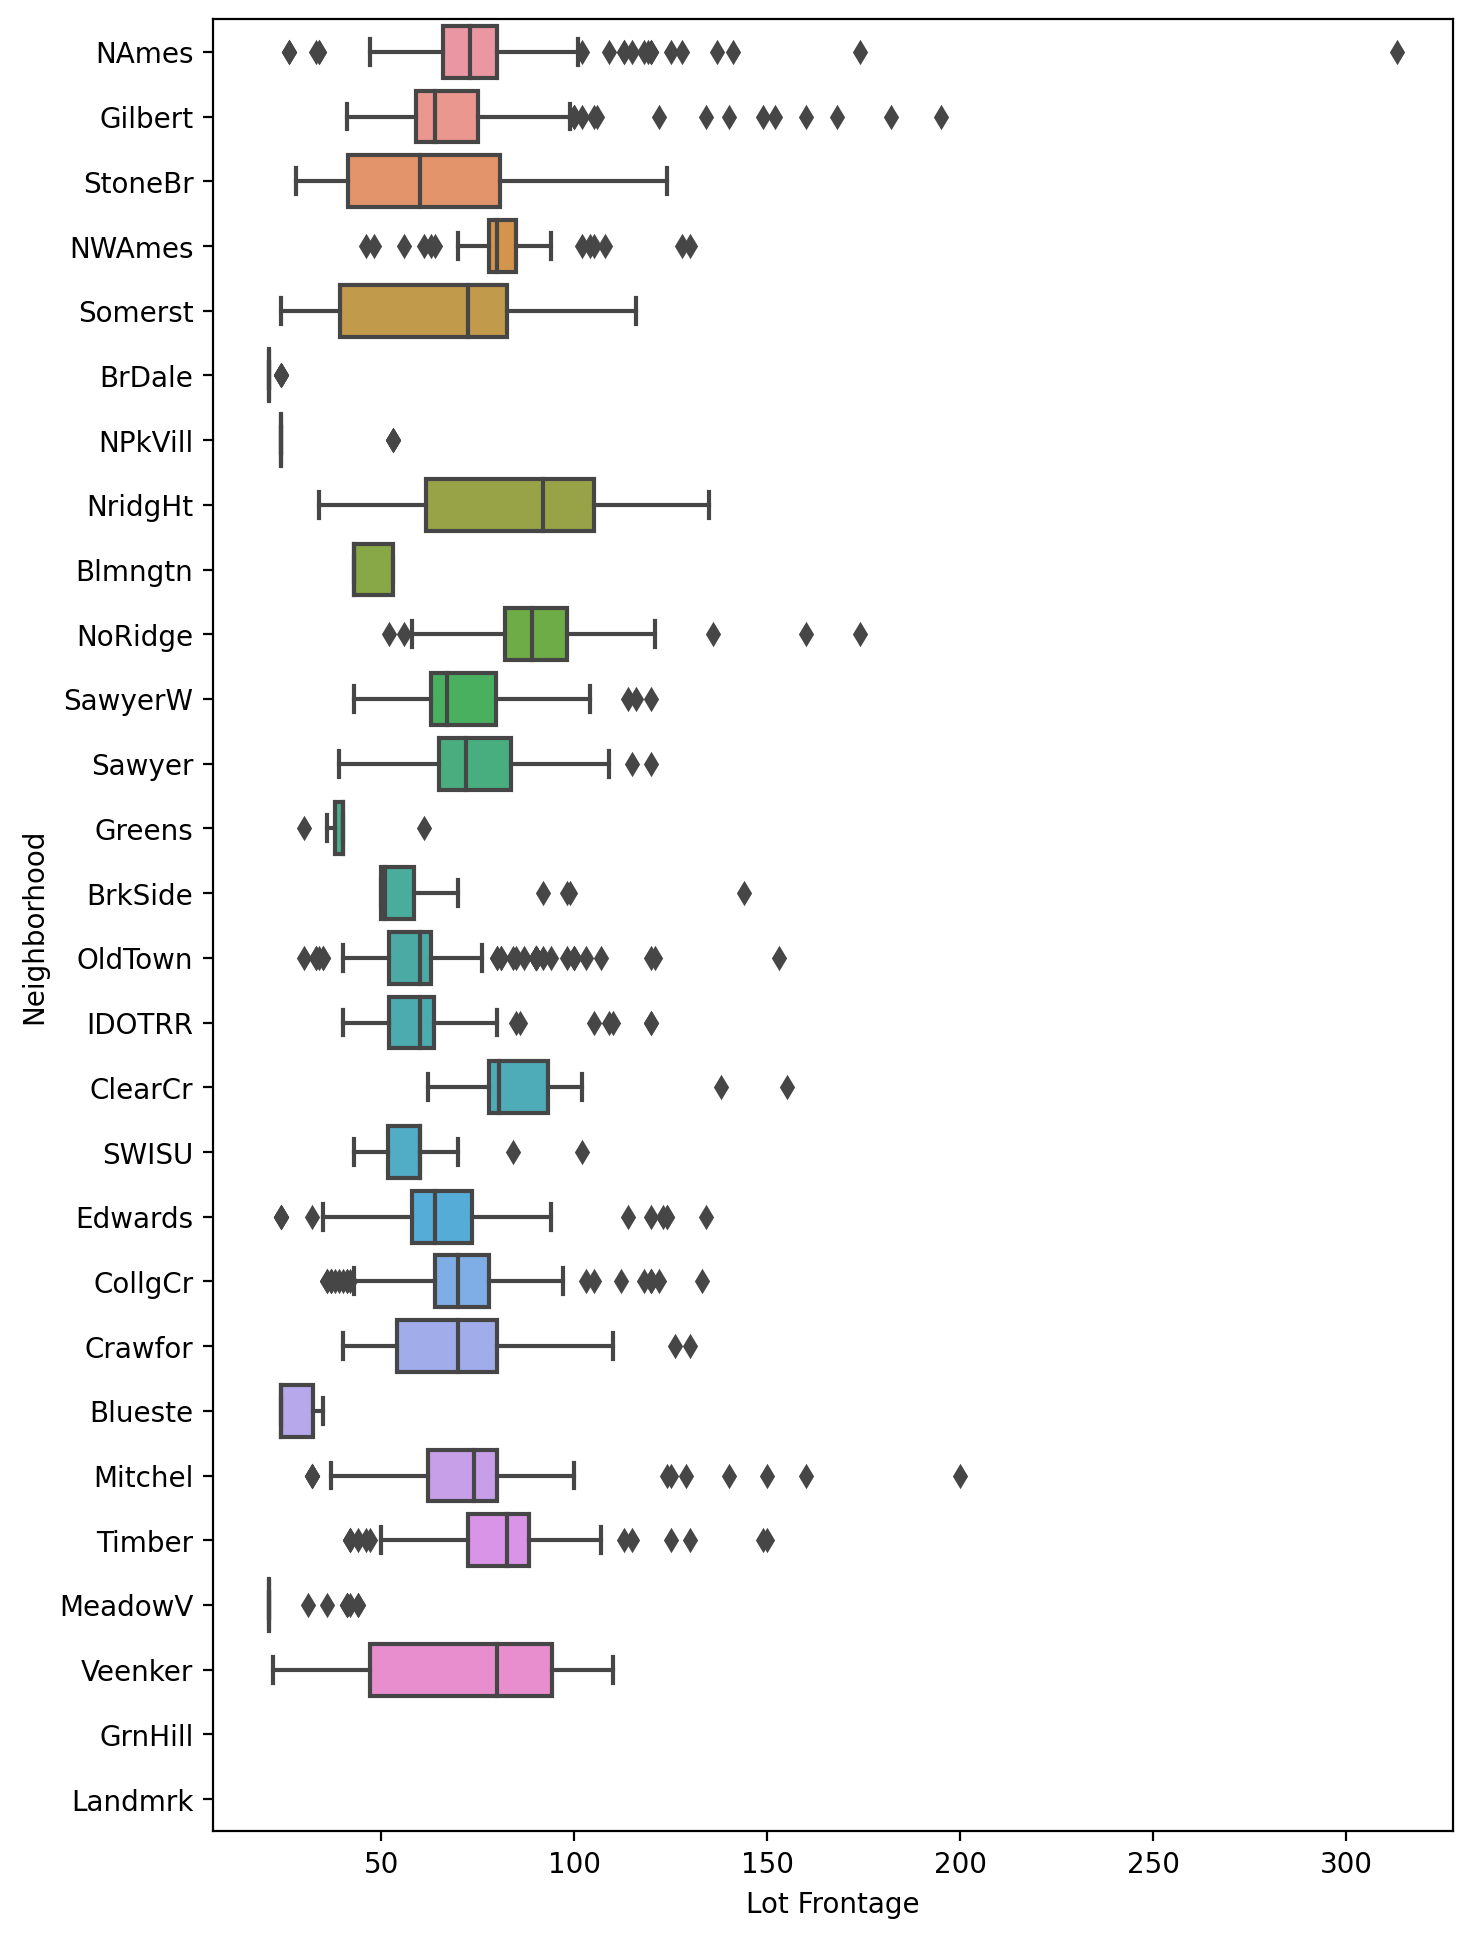

In [69]:
plt.figure(figsize = (8,12), dpi= 200)
sns.boxplot(x = 'Lot Frontage', y ='Neighborhood', data = df, orient='h')

In [70]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [73]:
df['Lot Frontage']=df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [75]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [76]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [77]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

# Dealing With Categorical Data
